In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
import xarray as xr
import os
import glob
import matplotlib.pyplot as plt

In [2]:
pwd = os.getcwd()
Models_path = pwd + '/Models/'
Models = glob.glob(Models_path + 'data*.h5')
Data_path = pwd + '/Data/'
Datas = glob.glob(Data_path + '*.csv')


In [3]:
Model_path = Models[0]

In [27]:
Models

['/home/bouissob/Script/Models/data_Ocean1_COM_NEMO-CNRS%1645097505.4334998.h5']

In [24]:
Model = tf.keras.models.load_model(Model_path)
Mod_name = Model_path.split('/')
Mod_name = Mod_name[len(Mod_name) - 1]
Mod_name = Mod_name.split('.h')[0]
Norm_Data_path = Models_path + 'Norm_values_for_models/' + Mod_name + '/'
#maxY = 2.6032685 * 10**-6

MeanX = pd.read_pickle(Norm_Data_path + 'MeanX.pkl')
StdX = pd.read_pickle(Norm_Data_path + 'StdX.pkl')
maxY = np.loadtxt(Norm_Data_path + 'MaxY.csv')
Data_Tot = pd.read_csv(Datas[0])

In [28]:
tf.keras.activations.swish

2.4.1


In [25]:
Data_clean = Data_Tot.loc[~Data_Tot.thermalDriving.isna() & ~Data_Tot.meltRate.isna() 
                          & ~Data_Tot.halineDriving.isna() & ~Data_Tot.iceDraft.isna()]

/home/bouissob/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


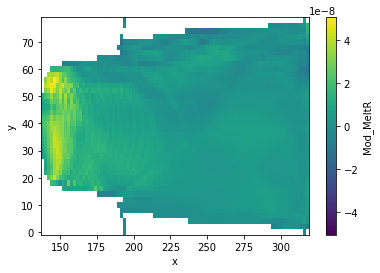

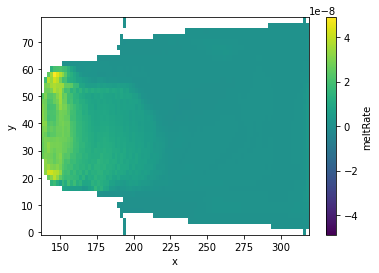

In [31]:
Var_names_X = ['thermalDriving', 'x', 'y', 'iceDraft', 'halineDriving']
Data = Data_clean.loc[Data_clean.date ==10]
X = Data[Var_names_X]
X_N = np.array((X - MeanX)/StdX)
X_N = np.array(X_N).reshape(-1, 5, )
Y = Data['meltRate']

Y_mod = Model(X_N)*maxY
Data['Mod_MeltR'] = Y_mod.numpy().reshape(len(Y_mod), )
Data = Data.set_index(['y', 'x'])
Dataset = Data.to_xarray()
Dataset.Mod_MeltR.plot(cmap = plt.get_cmap('viridis'))
plt.figure()
Dataset.meltRate.plot(cmap = plt.get_cmap('viridis'))